Dataset Shape: (5000, 7)

Columns: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']

Sample Data:
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472 

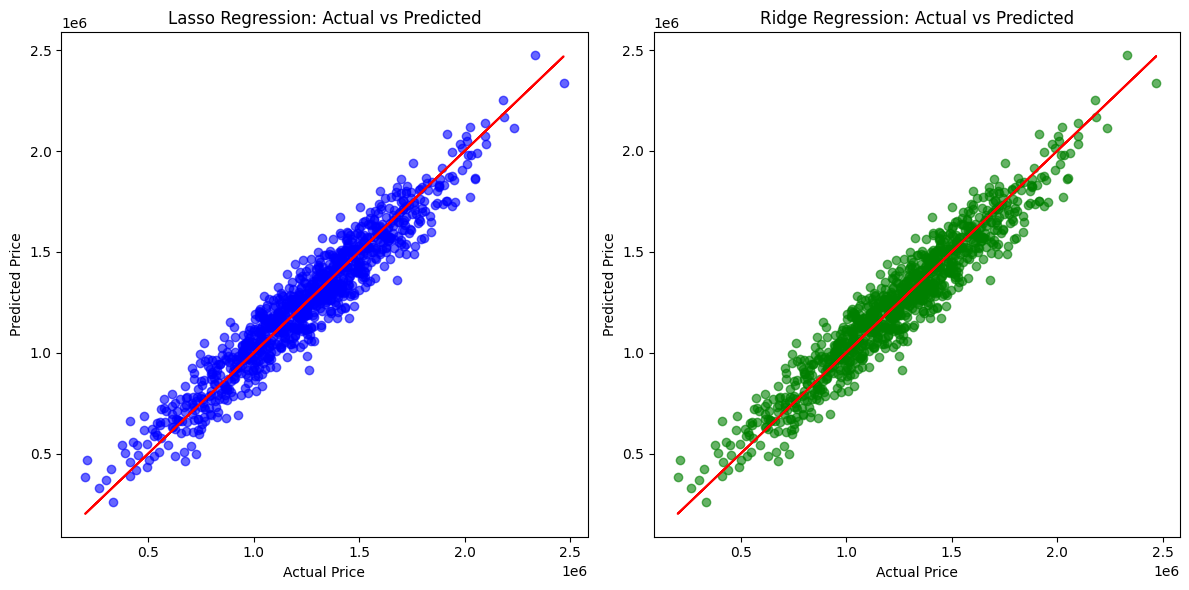

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = pd.read_csv("housing_price_dataset.csv")

print("Dataset Shape:", data.shape)
print("\nColumns:", list(data.columns))
print("\nSample Data:\n", data.head())


X = data[['Avg. Area Income', 'Avg. Area House Age',
          'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
          'Area Population']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': np.logspace(-3, 2, 20)}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

ridge = Ridge(max_iter=10000)
ridge_params = {'alpha': np.logspace(-3, 2, 20)}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n📊 {name} Regression Results:")
    print(f"R² Score      : {r2:.4f}")
    print(f"MAE           : {mae:.4f}")
    print(f"MSE           : {mse:.4f}")
    print(f"RMSE          : {rmse:.4f}")

evaluate_model("Lasso (L1)", y_test, y_pred_lasso)
evaluate_model("Ridge (L2)", y_test, y_pred_ridge)

print("\nBest Alpha (Lasso):", lasso_grid.best_params_['alpha'])
print("Best Alpha (Ridge):", ridge_grid.best_params_['alpha'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6)
plt.plot(y_test, y_test, color='red')
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.plot(y_test, y_test, color='red')
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()